<a href="https://colab.research.google.com/github/Vigmt/projeto_beyonce-x-ludmilla/blob/main/Projetofinal_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Codigos para Subir Bibliotecas

In [ ]:
!pip install spotipy
!pip install seaborn matplotlib
!pip install backoff

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Autenticação

In [ ]:
import spotipy
from spotipy.oauth2  import SpotifyClientCredentials
import os

# Configure suas credenciais
os.environ['SPOTIPY_CLIENT_ID'] = '0bd43c7e681d4c0e9035cff50ffd03c9'
os.environ['SPOTIPY_CLIENT_SECRET'] = '2e803efd8ad446fe986ebafd3ccd2a38'

# Autenticação
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())
print('Autenticado com sucesso!')

Autenticado com sucesso!


# 1. Qual o impacto de colaborações musicais no desempenho de Ludmilla e Beyoncé no Spotify?

In [ ]:
#Definir função para identificar a média de popularidade de cada artista
def get_artist_info(artist_name, country):
  #Buscar o artista
  results = sp.search(q=artist_name, type='artist')
  artist = results['artists']['items'][0]

  #Obter popularidade do artista
  artist_popularity = artist['popularity']

  #Obter as faixas mais populares - Solo e Colaborações
  top_tracks = sp.artist_top_tracks(artist['id'], country=country)

  solo_popularity = []
  collab_popularity = []

  for track in top_tracks['tracks']:
    track_artists = [artist['name'] for artist in track['artists']]
    if len(track_artists) > 1:
      collab_popularity.append(track['popularity'])
    else:
      solo_popularity.append(track['popularity'])

  #Calcular médias de popularidade
  mean_solo = sum(solo_popularity) / len(solo_popularity) if solo_popularity else 0
  mean_collab = sum(collab_popularity) / len(collab_popularity) if solo_popularity else 0

  #Imprimir informações
  print(f"Nome: {artist['name']}")
  print(f"Gêneros: {',' .join(artist['genres'])}")
  print(f"Popularidade: {artist_popularity}")
  print(f"Média de Popularidade Solo: {mean_solo:.1f}")
  print(f"Média de Popularidade em Colaborações: {mean_collab:.1f}\n")

#Obter informações de Ludmilla
get_artist_info('Ludmilla', country='BR')

#Obter informações de Beyoncé
get_artist_info('Beyoncé', country='US')

Nome: LUDMILLA
Gêneros: funk carioca,funk pop,funk rj,pagode baiano,pop nacional
Popularidade: 78
Média de Popularidade Solo: 64.0
Média de Popularidade em Colaborações: 66.7

Nome: Beyoncé
Gêneros: pop,r&b
Popularidade: 87
Média de Popularidade Solo: 68.5
Média de Popularidade em Colaborações: 72.5



In [ ]:
#Definir função para identificar quais músicas são mais populares

def get_top_tracks(artist_name, country):
  #Buscar o artista
  results = sp.search(q=artist_name, type='artist')
  artist = results['artists']['items'][0]

  #Obter as faixas mais populares
  top_tracks = sp.artist_top_tracks(artist['id'], country=country)

  #Exibir o top10 mais populares
  print(f"Top 10 faixas de {artist['name']}:")
  for track in top_tracks['tracks']:
    track_artists = [artist['name'] for artist in track['artists']]
    if len(track_artists) > 1:
      print(f"COLABORAÇÃO - Nome da música: {track['name']}, Popularidade: {track['popularity']}")
    else:
      print(f"SOLO - Nome da música: {track['name']}, Popularidade: {track['popularity']}")

#Obter os dados de Ludmilla
get_top_tracks('Ludmilla', country='BR')
print()
#Obter os dados de Beyoncé
get_top_tracks('Beyoncé', country='US')

Top 10 faixas de LUDMILLA:
COLABORAÇÃO - Nome da música: No_se_ve.mp3, Popularidade: 71
COLABORAÇÃO - Nome da música: Não Para, Popularidade: 71
SOLO - Nome da música: Maliciosa - Ao Vivo, Popularidade: 63
COLABORAÇÃO - Nome da música: Dia de Fluxo, Popularidade: 70
COLABORAÇÃO - Nome da música: Ainda Gosto de Você / Já Era - Ao Vivo, Popularidade: 68
COLABORAÇÃO - Nome da música: Falta de Mim - Ao Vivo, Popularidade: 65
COLABORAÇÃO - Nome da música: Numanice Lud Session - Modo Avião / A Tua Voz / 700 Por Hora / Radar / A Música Mais Triste do Ano - Ao vivo, Popularidade: 68
SOLO - Nome da música: A boba fui eu - Recorded At Mosh Studios, São Paulo, Popularidade: 65
SOLO - Nome da música: Você Não Sabe o Que é Amor - Ao Vivo, Popularidade: 64
COLABORAÇÃO - Nome da música: Poesia Acústica #10 Recomeçar, Popularidade: 54

Top 10 faixas de Beyoncé:
COLABORAÇÃO - Nome da música: Crazy In Love (feat. Jay-Z), Popularidade: 77
SOLO - Nome da música: TEXAS HOLD 'EM, Popularidade: 74
SOLO - Nom

####**Representação Gráfica - Médias de Popularidade de Ludmilla e Beyoncé (Músicas Solo e Colaborações)**

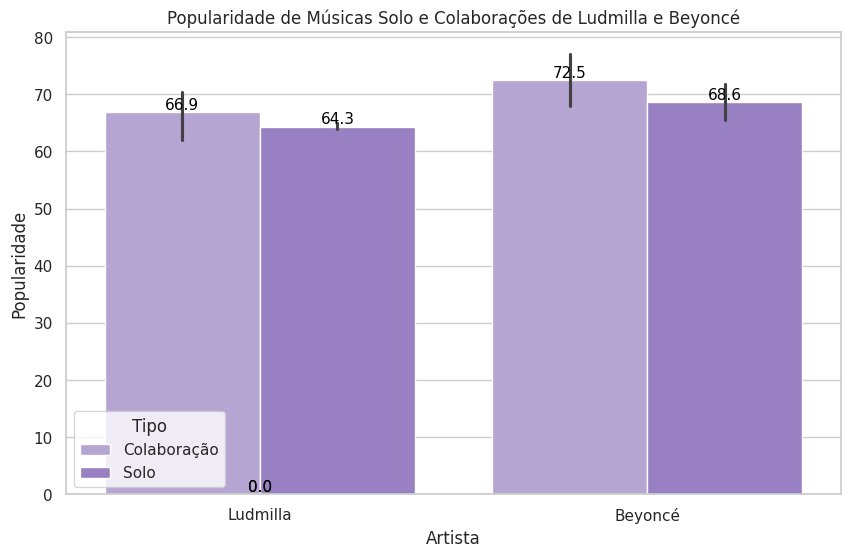

In [ ]:
# Dados para Ludmilla (extraídos da função get_top_tracks)
ludmilla_tracks = [
    {'name': 'Não Para', 'popularity': 72, 'type': 'Colaboração'},
    {'name': 'No_se_ve.mp3', 'popularity': 71, 'type': 'Colaboração'},
    {'name': 'Maliciosa - Ao Vivo', 'popularity': 64, 'type': 'Solo'},
    {'name': 'Dia de Fluxo', 'popularity': 71, 'type': 'Colaboração'},
    {'name': 'Ainda Gosto de Você / Já Era - Ao Vivo', 'popularity': 68, 'type': 'Colaboração'},
    {'name': 'Falta de Mim - Ao Vivo', 'popularity': 65, 'type': 'Colaboração'},
    {'name': 'Numanice Lud Session', 'popularity': 68, 'type': 'Colaboração'},
    {'name': 'A boba fui eu', 'popularity': 65, 'type': 'Solo'},
    {'name': 'Você Não Sabe o Que é Amor - Ao Vivo', 'popularity': 64, 'type': 'Solo'},
    {'name': 'Poesia Acústica #10 Recomeçar', 'popularity': 53, 'type': 'Colaboração'}
]

# Dados para Beyoncé (extraídos da função get_top_tracks)
beyonce_tracks = [
    {'name': 'Crazy In Love', 'popularity': 77, 'type': 'Colaboração'},
    {'name': 'TEXAS HOLD \'EM', 'popularity': 74, 'type': 'Solo'},
    {'name': 'Halo', 'popularity': 64, 'type': 'Solo'},
    {'name': 'CUFF IT', 'popularity': 75, 'type': 'Solo'},
    {'name': 'Single Ladies', 'popularity': 63, 'type': 'Solo'},
    {'name': 'Irreplaceable', 'popularity': 66, 'type': 'Solo'},
    {'name': 'If I Were a Boy', 'popularity': 63, 'type': 'Solo'},
    {'name': 'Love On Top', 'popularity': 72, 'type': 'Solo'},
    {'name': 'Beautiful Liar', 'popularity': 68, 'type': 'Colaboração'},
    {'name': 'Haunted', 'popularity': 72, 'type': 'Solo'}
]

# Combinar os dados das duas artistas
tracks_data = []

for track in ludmilla_tracks:
    tracks_data.append({
        'Artista': 'Ludmilla',
        'Música': track['name'],
        'Popularidade': track['popularity'],
        'Tipo': track['type']
    })

for track in beyonce_tracks:
    tracks_data.append({
        'Artista': 'Beyoncé',
        'Música': track['name'],
        'Popularidade': track['popularity'],
        'Tipo': track['type']
    })

# Converter para DataFrame
df = pd.DataFrame(tracks_data)

# Definir o estilo do gráfico
sns.set(style="whitegrid")
palette = ['#B39DDB', '#9575CD']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Artista', y='Popularidade', hue='Tipo', data=df, palette=palette)

# Adicionar rótulos no topo das colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black')

# Título e rótulos
plt.title('Popularidade de Músicas Solo e Colaborações de Ludmilla e Beyoncé')
plt.ylabel('Popularidade')
plt.xlabel('Artista')

# Exibir o gráfico
plt.show()

# 2.  Qual é a evolução da popularidade ao longo dos anos?











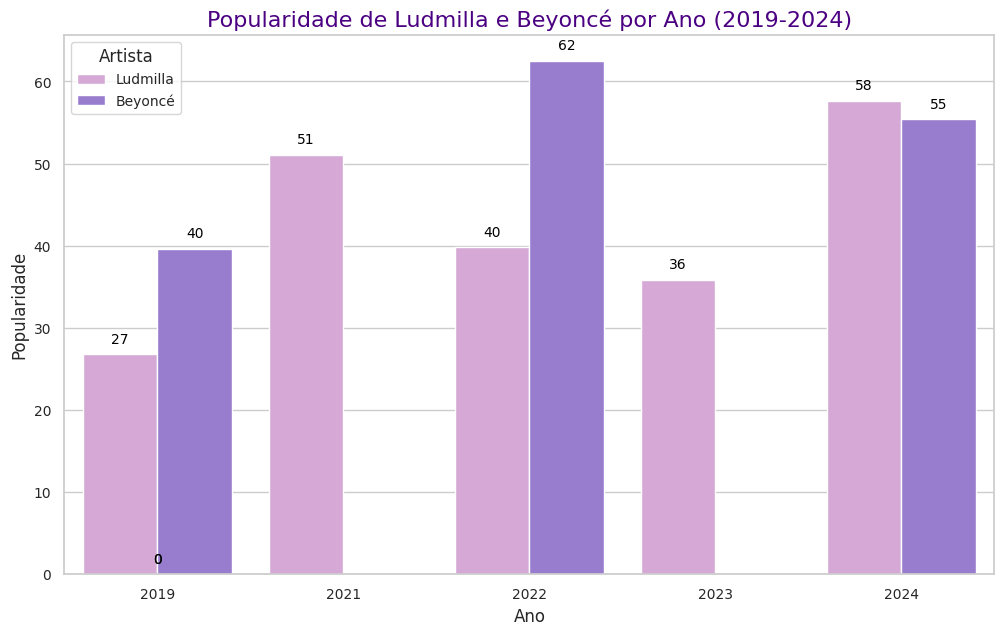

In [ ]:
# Função para obter as músicas de um artista
def get_artist_tracks(artist_name, limit_years=None):
    # Buscar o artista no Spotify
    results = sp.search(q='artist:' + artist_name, type='artist')
    artist = results['artists']['items'][0]
    artist_id = artist['id']

    # Buscar os álbuns do artista


    albums = sp.artist_albums(artist_id, album_type='album')
    tracks_data = []

    for album in albums['items']:
        # Obter o ano de lançamento do álbum
        release_date = album['release_date']
        release_year = int(release_date.split('-')[0])

        # Limitar aos anos especificados
        if limit_years and release_year not in limit_years:
            continue

        # Obter as faixas do álbum
        album_tracks = sp.album_tracks(album['id'])
        for track in album_tracks['items']:
            # Obter a popularidade da música
            track_info = sp.track(track['id'])
            popularity = track_info['popularity']

            # Guardar as informações relevantes
            tracks_data.append({'name': track_info['name'],
                                'popularity': popularity,
                                'release_year': release_year,
                                'artist': artist_name})

    return tracks_data

# Definir os nomes dos artistas e anos limite (2020 a 2024)
artists = ['Ludmilla', 'Beyoncé']
limit_years = range(2019, 2025)  # Limitando de 2020 até 2024

# Obter as faixas de ambos os artistas
all_tracks_data = []
for artist in artists:
    artist_tracks = get_artist_tracks(artist, limit_years)
    all_tracks_data.extend(artist_tracks)

# Transformar os dados em um DataFrame
df_tracks = pd.DataFrame(all_tracks_data)

# Configurar a paleta de cores
sns.set(style="whitegrid")
lilac_palette = sns.color_palette(["#DDA0DD", "#9370DB"])

# Criar o gráfico de barras comparativo usando Seaborn
plt.figure(figsize=(12, 7))

# Gráfico com barras agrupadas por artista, removendo as barras de erro (ci=None)
ax = sns.barplot(data=df_tracks, x='release_year', y='popularity', hue='artist',
                 palette=lilac_palette, errorbar=None)

# Adicionar rótulos em cima das barras com números inteiros
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1),  # +1 para mover um pouco para cima
                ha='center', va='bottom', fontsize=10, color='black')

# Ajustes visuais do gráfico
plt.title('Popularidade de Ludmilla e Beyoncé por Ano (2019-2024)', fontsize=16, color='#4B0082')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Popularidade', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Artista', loc='upper left', fontsize=10)
plt.grid(True, axis='y')  # Grid apenas no eixo Y, como no exemplo anterior

# Exibir o gráfico
plt.show()


# 3.  Quantos seguidores Ludmilla e Beyoncé têm no Spotify atualmente?

LUDMILLA tem 7732481 seguidores no Spotify atualmente.
Beyoncé tem 38792986 seguidores no Spotify atualmente.


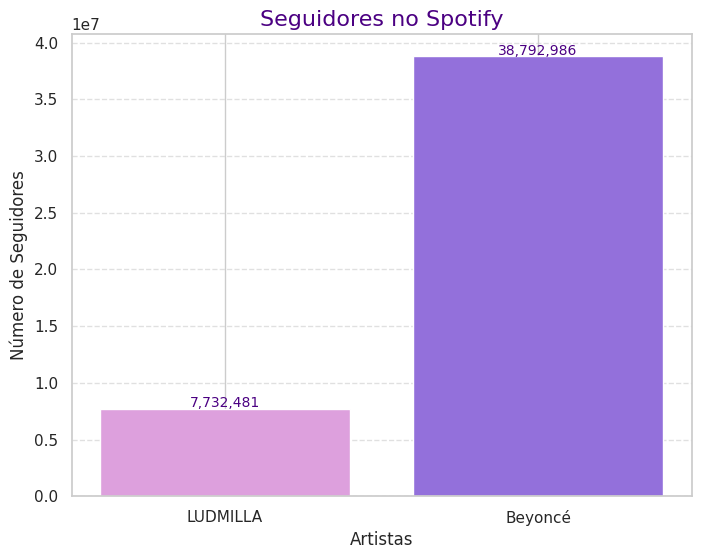

In [ ]:
# IDs dos artistas no Spotify
ludmilla_id = '3CDoRporvSjdzTrm99a3gi'  # ID da Ludmilla
beyonce_id = '6vWDO969PvNqNYHIOW5v0m'   # ID da Beyoncé

# Função para obter o número de seguidores de um artista
def get_artist_followers(artist_id):
    artist = sp.artist(artist_id)
    return artist['followers']['total'], artist['name']

# Consultar o número de seguidores de Ludmilla e Beyoncé
ludmilla_followers, ludmilla_name = get_artist_followers(ludmilla_id)
beyonce_followers, beyonce_name = get_artist_followers(beyonce_id)

# Exibir o número de seguidores
print(f'{ludmilla_name} tem {ludmilla_followers} seguidores no Spotify atualmente.')
print(f'{beyonce_name} tem {beyonce_followers} seguidores no Spotify atualmente.')

# Dados para o gráfico
artists = [ludmilla_name, beyonce_name]
followers = [ludmilla_followers, beyonce_followers]

# Gerar gráfico de barras com tons de lilás
plt.figure(figsize=(8, 6))
plt.bar(artists, followers, color=['#DDA0DD', '#9370DB'])  # Cores lilás
plt.title('Seguidores no Spotify', fontsize=16, color='#4B0082')  # Título em tom roxo escuro
plt.ylabel('Número de Seguidores', fontsize=12)
plt.xlabel('Artistas', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Exibir os valores exatos de seguidores nas barras
for i, value in enumerate(followers):
    plt.text(i, value + 100000, f'{value:,}', ha='center', fontsize=10, color='#4B0082')

# Mostrar gráfico
plt.show()



#4. Qual a duração média das músicas mais populares de Ludmilla e Beyoncé, e como isso se relaciona com a quantidade de reproduções de cada artista?


Duração média das músicas entre 2020-2024:
artist
Beyoncé     3.781323
Ludmilla    3.826138
Name: duration_min, dtype: float64
Correlação entre a duração da música e o número de streams: 0.07619830006298314


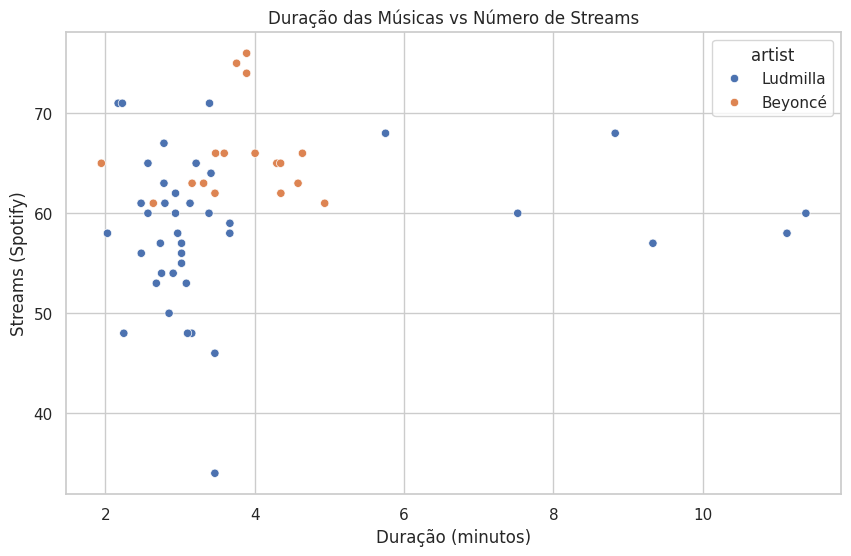

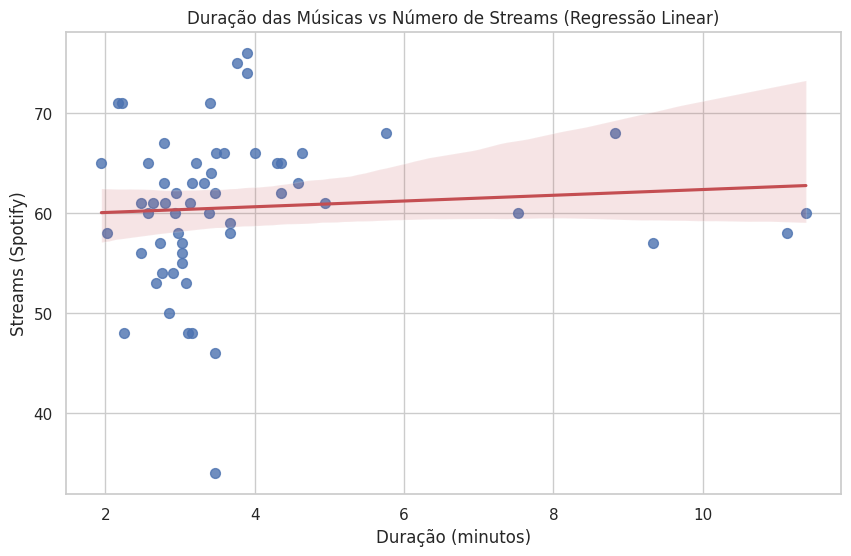

In [ ]:
# Função para obter músicas populares de uma artista entre 2020 e 2024
def get_top_tracks(artist_name):
    results = sp.search(q='artist:' + artist_name, type='track', limit=50)
    tracks = results['tracks']['items']
    track_data = []

    for track in tracks:
        release_year = int(track['album']['release_date'][:4])
        if 2020 <= release_year <= 2024:  # Filtra as músicas lançadas entre 2020 e 2024
            track_info = sp.track(track['id'])
            track_data.append({
                'name': track_info['name'],
                'duration_min': track_info['duration_ms'] / 60000,  # duração em minutos
                'streams': track_info['popularity'],  # Proxy para streams
                'release_year': release_year
            })

    return pd.DataFrame(track_data)

# Pegar músicas mais populares de Ludmilla e Beyoncé
ludmilla_tracks = get_top_tracks('Ludmilla')
beyonce_tracks = get_top_tracks('Beyoncé')

# Combinar os dados
df = pd.concat([ludmilla_tracks.assign(artist='Ludmilla'), beyonce_tracks.assign(artist='Beyoncé')])

# Calcular a duração média para cada artista
duration_mean = df.groupby('artist')['duration_min'].mean()
print("Duração média das músicas entre 2020-2024:")
print(duration_mean)

# Análise de correlação entre duração e streams
correlation = df['duration_min'].corr(df['streams'])
print(f"Correlação entre a duração da música e o número de streams: {correlation}")

# Plotar a relação entre duração e número de streams
plt.figure(figsize=(10,6))
sns.scatterplot(x='duration_min', y='streams', hue='artist', data=df)
plt.title('Duração das Músicas vs Número de Streams')
plt.xlabel('Duração (minutos)')
plt.ylabel('Streams (Spotify)')
plt.show()

# Gráfico de regressão linear
plt.figure(figsize=(10,6))
sns.regplot(x='duration_min', y='streams', data=df, scatter_kws={'s':50}, line_kws={"color":"r"})
plt.title('Duração das Músicas vs Número de Streams (Regressão Linear)')
plt.xlabel('Duração (minutos)')
plt.ylabel('Streams (Spotify)')
plt.show()

# 5. Qual o impacto de lançamentos recentes no aumento de popularidade de Ludmilla e Beyoncé no Spotify?

In [ ]:
def get_artist_popularity(artist_id):
    artist = sp.artist(artist_id)
    return artist['popularity']

def get_recent_releases(artist_id, start_year=2020, end_year=2024):
    albums = sp.artist_albums(artist_id, album_type='album,single', limit=50)
    recent_releases = {}

    for album in albums['items']:
        release_date = album['release_date']
        release_year = int(release_date.split('-')[0])

        if start_year <= release_year <= end_year:
          if release_year not in recent_releases:
            recent_releases[release_year] = []
          recent_releases[release_year].append(album)

    return recent_releases

def get_tracks_popularity(album_id):
    tracks = sp.album_tracks(album_id)
    track_popularities = []

    for track in tracks['items']:
        track_info = sp.track(track['id'])
        track_popularities.append({
            'Nome': track['name'],
            'Popularidade': track_info['popularity']
        })

    return track_popularities

def calculate_average_popularity(releases_by_year):
    popularity_by_year = {}

    for year, albums in releases_by_year.items():
        all_popularities = []
        for album in albums:
            track_popularities = get_tracks_popularity(album['id'])
            all_popularities.extend([track['Popularidade'] for track in track_popularities])

        if all_popularities:
            avg_popularity = np.mean(all_popularities)
            popularity_by_year[year] = avg_popularity

    return popularity_by_year

# IDs das artistas (exemplo fictício)
artist_1_id = '3CDoRporvSjdzTrm99a3gi'
artist_2_id = '6vWDO969PvNqNYHIOW5v0m'

# Obter a popularidade média das artistas por ano
artist_1_releases = get_recent_releases(artist_1_id)
artist_1_popularity = calculate_average_popularity(artist_1_releases)
artist_2_releases = get_recent_releases(artist_2_id)
artist_2_popularity = calculate_average_popularity(artist_2_releases)

# Obter lançamentos recentes e suas popularidades
years = range(2020, 2025)  # 2020 a 2024
popularity_values_1 = [artist_1_popularity.get(year, 0) for year in years]
popularity_values_2 = [artist_2_popularity.get(year, 0) for year in years]

# Calcular o aumento de popularidade
increase_artist_1 = popularity_values_1[-1] - popularity_values_1[0]
increase_artist_2 = popularity_values_2[-1] - popularity_values_2[0]

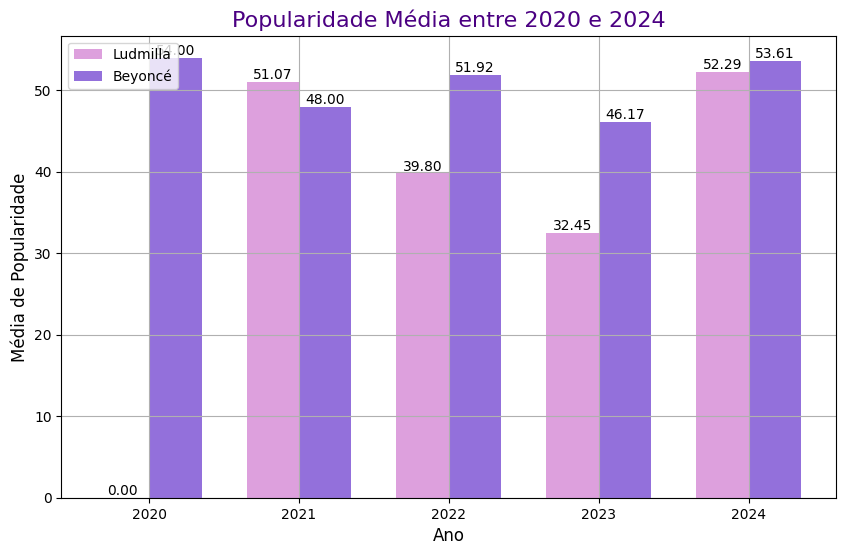

In [ ]:
import matplotlib.pyplot as plt

# Dados de exemplo
bar_width = 0.35
index = np.arange(len(years))

# Criar gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(index, popularity_values_1, bar_width, label='Ludmilla', color='#DDA0DD')
bars2 = ax.bar(index + bar_width, popularity_values_2, bar_width, label='Beyoncé', color='#9370DB')

plt.title('Popularidade Média entre 2020 e 2024', fontsize=16, color='#4B0082')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Média de Popularidade', fontsize=12)
plt.xticks(index + bar_width / 2, years)
plt.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Adicionar rótulos para cada conjunto de barras
add_labels(bars1)
add_labels(bars2)

plt.grid(True)
plt.show()

# 6. Qual a média de músicas nas playlists de Ludmilla e Beyoncé no Spotify?

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd


#Obter Listas de Playlists
def get_playlists_for_artist(artist_name):
    results = sp.search(q=artist_name, type='playlist')
    playlists = []
    for playlist in results['playlists']['items']:
      playlist_info = {
         'NomedaArtista': artist_name,
         'NomedaPlaylist': playlist['name'],
         'TotaldeMusicas': playlist['tracks']['total']
      }

      # Buscar detalhes das músicas da playlist usando o endpoint de tracks
      playlist_tracks = sp.playlist_tracks(playlist_id=playlist['id'], fields='items.track.duration_ms')

      if playlist_tracks and playlist_tracks.get('items'):
          total_duration_ms = sum([track.get('track', {}).get('duration_ms', 0)
          for track in playlist_tracks['items']])
      else:
          total_duration_ms = 0  # Set duration to 0 if no tracks or 'items' key missing

      # Calcular a duração total da playlist (somatório da duração de todas as músicas)
      total_duration_ms = sum([track['track']['duration_ms'] for track in playlist_tracks['items']])

      # Converter duração de milissegundos para minutos e segundos
      total_duration_min = total_duration_ms // 60000  # Minutos
      total_duration_sec = (total_duration_ms % 60000) // 1000  # Segundos

      # Adicionar a duração total em formato minutos e segundos
      playlist_info['DuracaoTotalMin'] = total_duration_min

      if total_duration_min <= 30:
        Categoria_Duracacao = 'Curta (≤30 min)'
      elif 30 < total_duration_min <= 60:
        Categoria_Duracacao = 'Média (30-60 min)'
      elif 60 < total_duration_min <= 90:
        Categoria_Duracacao = 'MédiaMédia (60-90 min)'
      elif 90 < total_duration_min <= 120:
        Categoria_Duracacao = 'Longa (90-120 min)'
      else:
        Categoria_Duracacao =  'Super Longa (>120 min)'
      # Adicionar a categoria da duracao em minutos
      playlist_info['Categoria_Duracacao'] = Categoria_Duracacao

      playlists.append(playlist_info)
    return playlists

#Obter os dados de Ludmilla
ludmilla_playlists = get_playlists_for_artist('Ludmilla')
#Obter os dados de Beyoncé
beyonce_playlists = get_playlists_for_artist('Beyonce')

all_playlists = ludmilla_playlists + beyonce_playlists
df = pd.DataFrame(all_playlists)

# Calcular a quantidade playlists, músicas e média de músicas nas playlists da Ludmilla
ludmilla_total_playlists = df[df['NomedaArtista'] == 'Ludmilla']['TotaldeMusicas'].count()
ludmilla_total_musicas_playlists = df[df['NomedaArtista'] == 'Ludmilla']['TotaldeMusicas'].sum()
ludmilla_mean_tracks = df[df['NomedaArtista'] == 'Ludmilla']['TotaldeMusicas'].mean()
ludmilla_mean_duracao = df[df['NomedaArtista'] == 'Ludmilla']['DuracaoTotalMin'].mean()

# Calcular a quantidade playlists, músicas e média de músicas nas playlists da  Beyoncé
beyonce_total_playlistss = df[df['NomedaArtista'] == 'Beyonce']['TotaldeMusicas'].count()
beyonce_total_musicas_playlistss = df[df['NomedaArtista'] == 'Beyonce']['TotaldeMusicas'].sum()
beyonce_mean_tracks = df[df['NomedaArtista'] == 'Beyonce']['TotaldeMusicas'].mean()
beyonce_mean_duracao = df[df['NomedaArtista'] == 'Beyonce']['DuracaoTotalMin'].mean()

# Exibir os resultados
print(f"Ludmilla: total de {ludmilla_total_playlists:.0f} playlists com uma média de {ludmilla_mean_tracks:.2f} músicas e duração média de {ludmilla_mean_duracao:.2f} minutos")
print(f"Beyoncé: total de {beyonce_total_playlistss:.0f} playlists com uma média de {beyonce_mean_tracks:.2f} músicas e duração média de {beyonce_mean_duracao:.2f} minutos")


Ludmilla: total de 10 playlists com uma média de 77.50 músicas e duração média de 194.80 minutos
Beyoncé: total de 9 playlists com uma média de 60.78 músicas e duração média de 233.44 minutos


# 7. Considerando as playlists com músicas da Ludmilla e Beyoncé, como estão classificadas as durações das músicas e qual o percentual de músicas duração

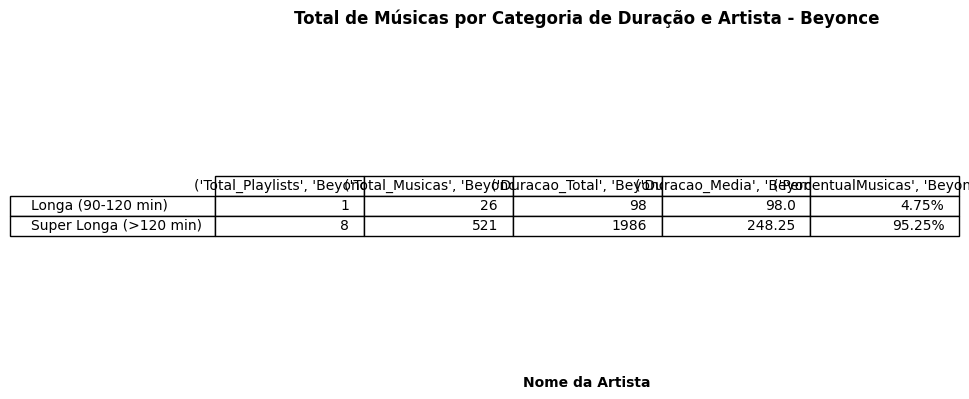

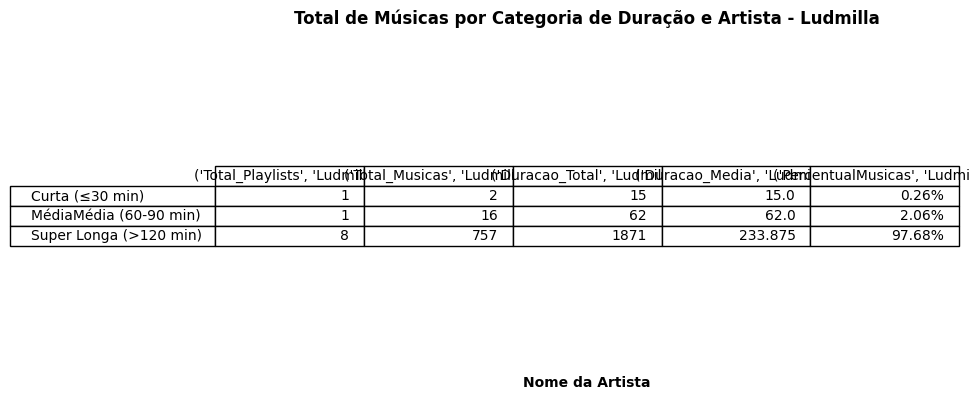

In [ ]:

#Obter Listas de Playlists
def get_playlists_for_artist(artist_name):
    results = sp.search(q=artist_name, type='playlist')
    playlists = []
    for playlist in results['playlists']['items']:
      playlist_info = {
         'NomedaArtista': artist_name,
         'NomedaPlaylist': playlist['name'],
         'TotaldeMusicas': playlist['tracks']['total']
      }

      # Buscar detalhes das músicas da playlist usando o endpoint de tracks
      playlist_tracks = sp.playlist_tracks(playlist_id=playlist['id'], fields='items.track.duration_ms')

      if playlist_tracks and playlist_tracks.get('items'):
          total_duration_ms = sum([track.get('track', {}).get('duration_ms', 0)
          for track in playlist_tracks['items']])
      else:
          total_duration_ms = 0  # Set duration to 0 if no tracks or 'items' key missing

      # Calcular a duração total da playlist (somatório da duração de todas as músicas)
      total_duration_ms = sum([track['track']['duration_ms'] for track in playlist_tracks['items']])

      # Converter duração de milissegundos para minutos e segundos
      total_duration_min = total_duration_ms // 60000  # Minutos
      total_duration_sec = (total_duration_ms % 60000) // 1000  # Segundos

      # Adicionar a duração total em formato minutos e segundos
      playlist_info['DuracaoTotalMin'] = total_duration_min

      if total_duration_min <= 30:
        Categoria_Duracacao = 'Curta (≤30 min)'
      elif 30 < total_duration_min <= 60:
        Categoria_Duracacao = 'Média (30-60 min)'
      elif 60 < total_duration_min <= 90:
        Categoria_Duracacao = 'MédiaMédia (60-90 min)'
      elif 90 < total_duration_min <= 120:
        Categoria_Duracacao = 'Longa (90-120 min)'
      else:
        Categoria_Duracacao =  'Super Longa (>120 min)'
      # Adicionar a categoria da duracao em minutos
      playlist_info['CategoriaDuracacao'] = Categoria_Duracacao

      playlists.append(playlist_info)
    return playlists

#Obter os dados de Ludmilla
ludmilla_playlists = get_playlists_for_artist('Ludmilla')
beyonce_playlists = get_playlists_for_artist('Beyonce')

df_ludmilla_playlists = pd.DataFrame(ludmilla_playlists)
df_beyonce_playlists = pd.DataFrame(beyonce_playlists)

# Assuming your DataFrame is named 'df' and has columns:
# 'NomedaArtista', 'CategoriaDuracacao', 'TotaldeMusicas'

# 1. Group the data and calculate the total music count

df_grouped = df_beyonce_playlists.groupby(['CategoriaDuracacao', 'NomedaArtista']).agg(
    Total_Playlists=('NomedaPlaylist', 'count'),       # Contar o número de playlists
    Total_Musicas=('TotaldeMusicas', 'sum'),           # Somar o total de músicas
    Duracao_Total=('DuracaoTotalMin', 'sum'),           # Somar o duracao total de músicas
    Duracao_Media=('DuracaoTotalMin', 'mean')           # Somar o duracao total de músicas
).reset_index()

#.map('{:.2f}%'.format)
df_grouped['PercentualMusicas'] = (df_grouped['Total_Musicas']/df_grouped['Total_Musicas'].sum())*100
df_grouped['PercentualMusicas'] = df_grouped['PercentualMusicas'].map('{:.2f}%'.format)


# 2. Pivot the DataFrame for better table structure (optional but recommended)
df_pivot_b = df_grouped.pivot(index='CategoriaDuracacao',
                                                      columns='NomedaArtista',
                                                      values=['Total_Playlists', 'Total_Musicas', 'Duracao_Total', 'Duracao_Media', 'PercentualMusicas'])

# 3. Create the table using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust figure size as needed
ax.axis('off')  # Hide axes


table = ax.table(cellText=df_pivot_b.values,
                 colLabels=df_pivot_b.columns,
                 rowLabels=df_pivot_b.index,
                 loc='center')

# Add a title
ax.set_title('Total de Músicas por Categoria de Duração e Artista - Beyonce', fontweight='bold', pad=20)  # Add padding for title

# Add x-axis label
ax.text(0.5, -0.05, 'Nome da Artista', ha='center', va='top', transform=ax.transAxes, fontweight='bold')

# Style the table (optional)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust scaling as needed

# Display the table
plt.show()


df_grouped = df_ludmilla_playlists.groupby(['CategoriaDuracacao', 'NomedaArtista']).agg(
    Total_Playlists=('NomedaPlaylist', 'count'),       # Contar o número de playlists
    Total_Musicas=('TotaldeMusicas', 'sum'),           # Somar o total de músicas
    Duracao_Total=('DuracaoTotalMin', 'sum'),           # Somar o duracao total de músicas
    Duracao_Media=('DuracaoTotalMin', 'mean')           # Somar o duracao total de músicas
).reset_index()

df_grouped['PercentualMusicas'] = (df_grouped['Total_Musicas']/df_grouped['Total_Musicas'].sum())*100
df_grouped['PercentualMusicas'] = df_grouped['PercentualMusicas'].map('{:.2f}%'.format)

# 2. Pivot the DataFrame for better table structure (optional but recommended)
df_pivot_l = df_grouped.pivot(index='CategoriaDuracacao',
                                                      columns='NomedaArtista',
                                                      values=['Total_Playlists', 'Total_Musicas', 'Duracao_Total', 'Duracao_Media', 'PercentualMusicas'])

# 3. Create the table using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust figure size as needed
ax.axis('off')  # Hide axes


table = ax.table(cellText=df_pivot_l.values,
                 colLabels=df_pivot_l.columns,
                 rowLabels=df_pivot_l.index,
                 loc='center')

# Add a title
ax.set_title('Total de Músicas por Categoria de Duração e Artista - Ludmilla', fontweight='bold', pad=20)  # Add padding for title

# Add x-axis label
ax.text(0.5, -0.05, 'Nome da Artista', ha='center', va='top', transform=ax.transAxes, fontweight='bold')

# Style the table (optional)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust scaling as needed

# Display the table
plt.show()